In [16]:
## Done By: Nayan Man Singh Pradhan

In [17]:
## Importing
import numpy as np 
import matplotlib.pyplot as plt

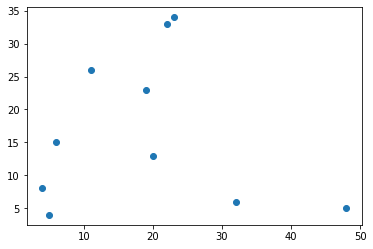

In [18]:
## a)

n = 10 ## number of random points
x = np.random.randint(0, 50, n) ## generates n random integers between 0 and 50
# print(x) ## test
y = np.random.randint(0, 50, n) ## generates n ranodm integers between 0 and 50
# print(y) ## test
coordinates = tuple(zip(x,y))
# print(coordinates) ## test
plt.scatter(x, y) ## create scatter
plt.show() ## plot scatter

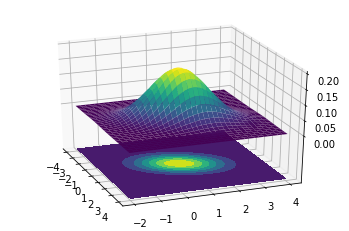

In [19]:
## b)

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# define 2d distribution over X and Y
N = 100
X = np.linspace(-4, 4, N)
Y = np.linspace(-2, 4, N)
X, Y = np.meshgrid(X, Y)

# mean matrix and sigma matrix
mean_matrix = np.array([0,1]) # making mean matrix
sigma_matrix = np.array([[1, 0.25], [0.5, 1]]) # making sigma matrix

# pack X and Y into single 3d array
pos = np.empty(X.shape + (2,))
pos[:, :, 0] = X
pos[:, :, 1] = Y

def twoD_Gaussian(pos, mean_matrix, sigma_matrix):
    shape = mean_matrix.shape[0]
    sigma_inv = np.linalg.inv(sigma_matrix) # inverse of sigma matrix
    sigma_det = np.linalg.det(sigma_matrix) # determinant of sigma matrix
    temp_denominator = np.sqrt((2*np.pi)**shape * sigma_det)
    fac = np.einsum('...k,kl,...l->...', pos-mean_matrix, sigma_inv, pos-mean_matrix)
    return (np.exp(-fac/2)/temp_denominator)
    
Z = twoD_Gaussian(pos, mean_matrix, sigma_matrix)

# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True,
                cmap=cm.viridis)

cset = ax.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
ax.set_zlim(-0.15,0.2)
ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()